# ML - Homework 1

***

## Problem 1

Compare the performance of three mean estimators: empirical mean, trimmed mean, and the median-of-means mean estimator. Generate distributions for both light (such as Gaussian, Laplace) and heavy tailed distributions (such as the Pareto family or Student’s t-distribution with di↵erent degrees of freedom)

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function definition

# Compute probability of being bigger than epsilon given multiple epsilons.
# Returns a list
def comp_probs (mean_est, epsilon):
    probs= [(np.sum(np.abs(mean_est)>eps)/len(mean_est)) for eps in epsilon]
    return probs

# Compute median of means given the number of blocks.
# Returns a list of medians of means
def comp_mom (X,n_blocks):
    means = [np.mean(block,axis=1) for block in np.split(X,n_blocks,axis=1)]
    return np.median(means,axis=0)

### Gaussian distribution

Experimenting with n iid gaussian distributed variables. Comparison between different mean estimators.

Let's first check how the mean estimator compares to the true distribution.

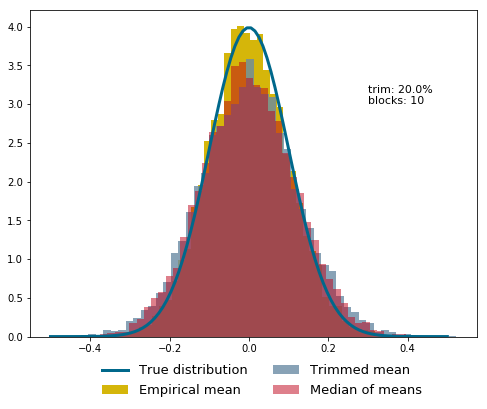

In [230]:
# Example for 100 variables
N=100
k=10000
np.random.seed(42)
X = np.random.randn(k,N)
blocks = 10
trim=0.2
bins = 50

fig,ax = plt.subplots(1,1,figsize=(8,6))

emp_mean = np.mean(X,axis=1)
trim_mean = stats.trim_mean(X,0.45,axis=1)
mom = comp_mom(X,blocks)

plt.hist(emp_mean, bins=bins,density = True,color = sns.xkcd_rgb["dark yellow"])
plt.hist(trim_mean, bins = bins,alpha = 0.8, color=sns.xkcd_rgb["grey blue"],density = True)
plt.hist(mom, bins = bins,alpha = 0.5, color=sns.xkcd_rgb["scarlet"],density = True)


a = np.linspace(-0.5,0.5,100)
plt.plot(a,stats.norm.pdf(a,loc=0,scale=1/np.sqrt(N)),color = '#00688B',lw=3)
plt.legend(["True distribution","Empirical mean","Trimmed mean","Median of means"],
           fontsize = 13,
           loc = (0.15,-0.2),ncol = 2,
           frameon=False);
#plt.title(f"{N} variable mean distribution with different estimators",fontsize = 20, y=1.05)
plt.text(x=0.3,y=3,s=f"trim: {trim*100}%\nblocks: {blocks}",fontsize=11)
 
fig.savefig("Gaussian_Mean_Distribution",bbox_inches='tight')

Defining the number of variables and the different epsilons to check

In [236]:
n_vars = [10,100,1000]
epsilon = np.logspace(-3,0,100)
k=10000

Comparing the different estimators in different cases.

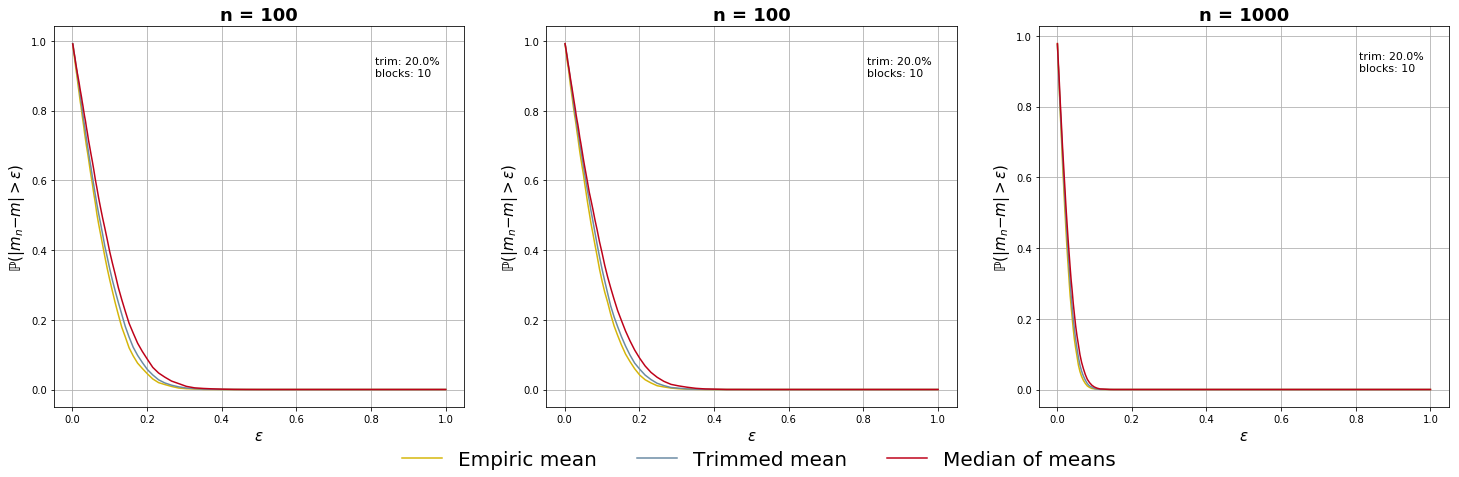

In [238]:
trim = 0.20
blocks = 10

fig,axes= plt.subplots(nrows = 1, ncols = 3, figsize = (25,7))

for ind,n_var in enumerate(n_vars):
    X = np.random.randn(k,int(n_var))
    
    emp_mean = np.mean(X,axis=1)
    axes[ind].plot(epsilon,comp_probs(emp_mean,epsilon),color = sns.xkcd_rgb["dark yellow"])
    
    trim_mean = stats.trim_mean(X,trim,axis =1)
    axes[ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = sns.xkcd_rgb["grey blue"])
    
    mom = comp_mom(X,blocks)
    axes[ind].plot(epsilon,comp_probs(mom,epsilon),color = sns.xkcd_rgb["scarlet"]) 
    
    axes[ind].set_xlabel("$\epsilon$",fontsize=15)
    axes[ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    axes[ind].grid(True)
    
    axes[ind].set_title(f"n = {n_var}",fontsize = 18,fontweight = 1000)
    axes[ind].text(x=0.81,y=0.9,s=f"trim: {trim*100}%\nblocks: {blocks}",fontsize=11)


fig.legend(["Empiric mean","Trimmed mean","Median of means"],fontsize = 20,loc = (0.27,0),ncol = 3,frameon=False)          
#fig.suptitle("Comparison between different mean estimators for iid Gaussian random variables",fontsize = 30,y=1);
fig.savefig("Gaussian_Mean_Estimator_Perfomance_Comparison",bbox_inches='tight')

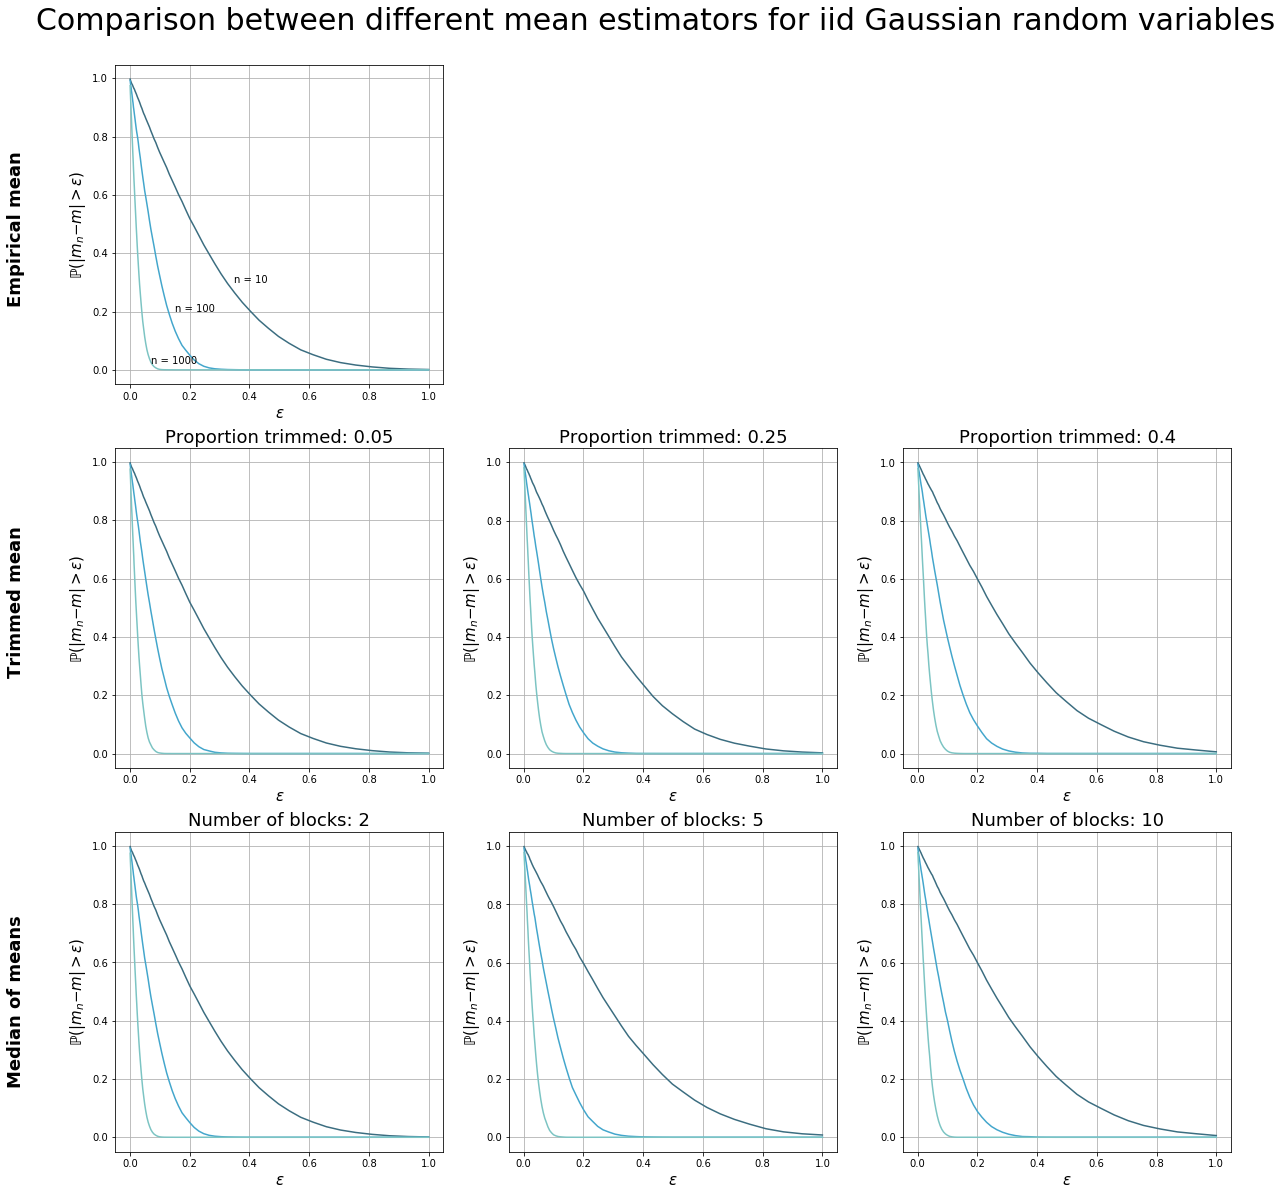

In [6]:
trim_props = [0.05,0.25,0.4]
mom_blocks = [2,5,10]

fig,axes= plt.subplots(nrows = 3, ncols = 3, figsize = (20,20))

palette = sns.color_palette("GnBu_d", n_colors = len(n_vars))
for palette_ind,n_var in enumerate(n_vars):
    X = np.random.randn(k,int(n_var))
    
    # Empirical mean
    emp_mean = np.mean(X,axis=1)
    axes[0,0].plot(epsilon,comp_probs(emp_mean,epsilon),color = palette[palette_ind])
    axes[0,0].grid(True)
    axes[0,0].set_xlabel("$\epsilon$",fontsize=15)
    axes[0,0].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    axes[0,1].set_visible(False)
    axes[0,2].set_visible(False)
    
    # Trimmed mean
    
    for ind,trims in enumerate(trim_props):
        trim_mean = stats.trim_mean(X,trims,axis =1)
        axes[1,ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = palette[palette_ind])
        axes[1,ind].grid(True)
        axes[1,ind].set_title("Proportion trimmed: " + str(trims),fontsize = 18)
        axes[1,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[1,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    # Median of means
    
    for ind,block in enumerate(mom_blocks):    
        mom = comp_mom(X,block)
        axes[2,ind].plot(epsilon,comp_probs(mom,epsilon),color = palette[palette_ind]) 
        axes[2,ind].grid(True)
        axes[2,ind].set_title("Number of blocks: " + str(block),fontsize=18)
        axes[2,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[2,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
        

axes[0,0].annotate("n = 10", (0.35,0.3))
axes[0,0].annotate("n = 100", (0.15,0.2))
axes[0,0].annotate("n = 1000", (0.07,0.02))

fig.text(0.05,0.81,"Empirical mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.55,"Trimmed mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.28,"Median of means",fontsize = 18,fontweight = 1000, rotation = 90)
fig.suptitle("Comparison between different mean estimators for iid Gaussian random variables",fontsize = 30,y=0.92);

### Laplace distribution

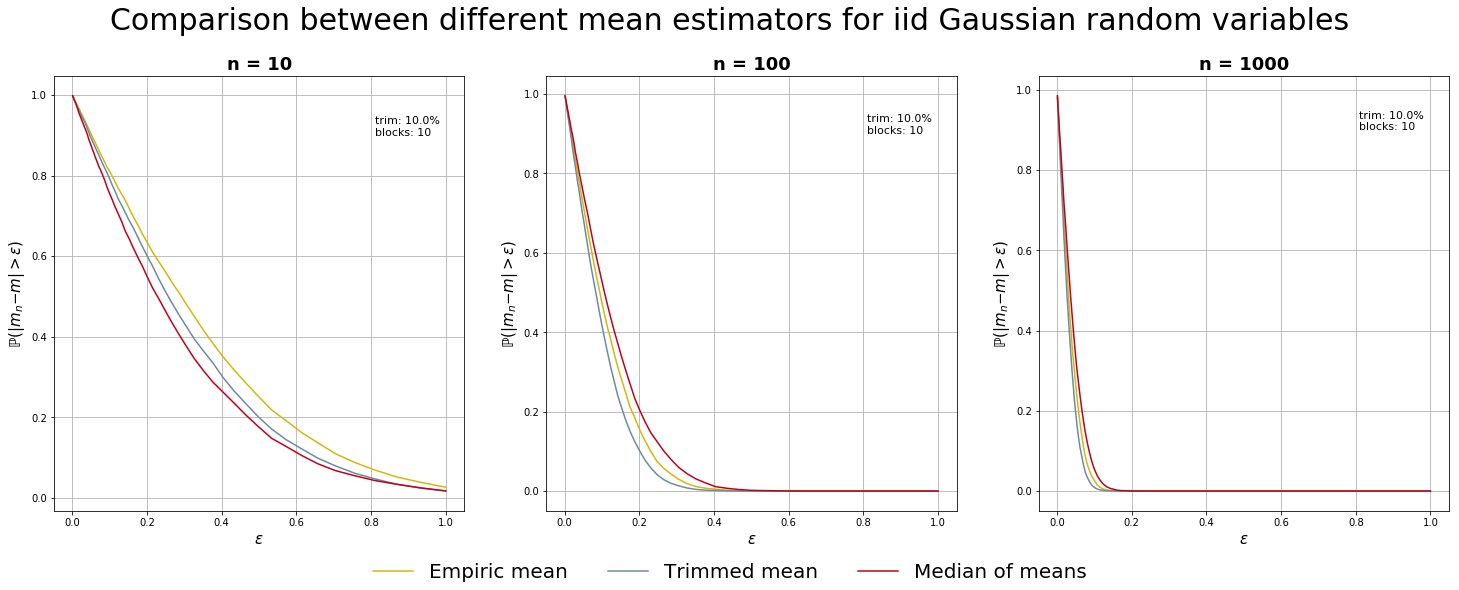

In [194]:
trim = 0.10
blocks = 10

fig,axes= plt.subplots(nrows = 1, ncols = 3, figsize = (25,8))

for ind,n_var in enumerate(n_vars):
    X = np.random.laplace(size=(k,int(n_var)))
    
    emp_mean = np.mean(X,axis=1)
    axes[ind].plot(epsilon,comp_probs(emp_mean,epsilon),color = sns.xkcd_rgb["dark yellow"])
    
    trim_mean = stats.trim_mean(X,trim,axis =1)
    axes[ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = sns.xkcd_rgb["grey blue"])
    
    mom = comp_mom(X,blocks)
    axes[ind].plot(epsilon,comp_probs(mom,epsilon),color = sns.xkcd_rgb["scarlet"]) 
    
    axes[ind].set_xlabel("$\epsilon$",fontsize=15)
    axes[ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    axes[ind].grid(True)
    axes[ind].text(x=0.81,y=0.9,s=f"trim: {trim*100}%\nblocks: {blocks}",fontsize=11)
    axes[ind].set_title(f"n = {n_var}",fontsize = 18,fontweight = 1000)
    
    


fig.legend(["Empiric mean","Trimmed mean","Median of means"],fontsize = 20,loc = (0.25,0),ncol = 3,frameon=False)          
fig.suptitle("Comparison between different mean estimators for iid Gaussian random variables",fontsize = 30,y=1);

### Student's distribution

Degrees of freedom from 1 < df ≤ 2 the variance does not exist and as df increase the student-t distribution tends to a normal distribution. In order to show interesting cases in the analysis of different mean estimators, we will analyze two specific cases: one, with infinite variance df = 2 ,and another one, with df = 5, which has fatter tails than a normal distribution but the variance exists.

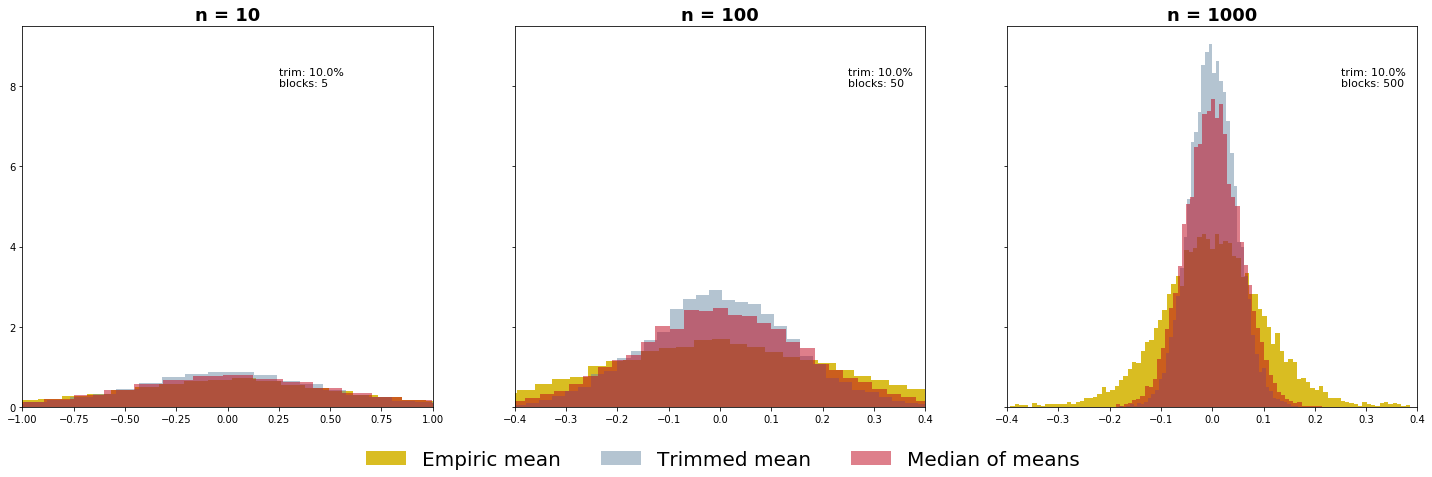

In [222]:
trim = [.1,0.1,0.1]
blocks = [5,50,500]
df = 2
n_vars = [10,100,1000]

k= 10000

np.random.seed(42)
fig,axes= plt.subplots(nrows = 1, ncols = 3, figsize = (25,7),sharey = True)


for ind,n_var in enumerate(n_vars):
    
    X = np.reshape(np.random.standard_t(df=df,size=k*n_var),(k,n_var))
    

    emp_mean = np.mean(X,axis=1)
    trim_mean = stats.trim_mean(X,trim[ind],axis =1)
    mom = comp_mom(X,blocks[ind])

    axes[ind].hist(emp_mean,bins=1000,density = True,alpha=0.9,color = sns.xkcd_rgb["dark yellow"])
    axes[ind].hist(trim_mean,bins=50,alpha = 0.5, color = sns.xkcd_rgb["grey blue"],density=True);
    axes[ind].hist(mom,bins=50,alpha = 0.5, color = sns.xkcd_rgb["scarlet"],density=True);
    axes[ind].set_xlim(-0.4,0.4)
    axes[ind].set_title(f"n = {n_var}",fontsize = 18,fontweight = 1000)
    axes[ind].text(x=0.25,y=8,s=f"trim: {trim[ind]*100}%\nblocks: {blocks[ind]}",fontsize=11)
    
axes[0].set_xlim(-1,1)
fig.legend(["Empiric mean","Trimmed mean","Median of means"],fontsize = 20,loc = (0.25,0),ncol = 3,frameon=False); 
fig.savefig(f"Student_df{df}",bbox_inches='tight')

/home/jrd/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


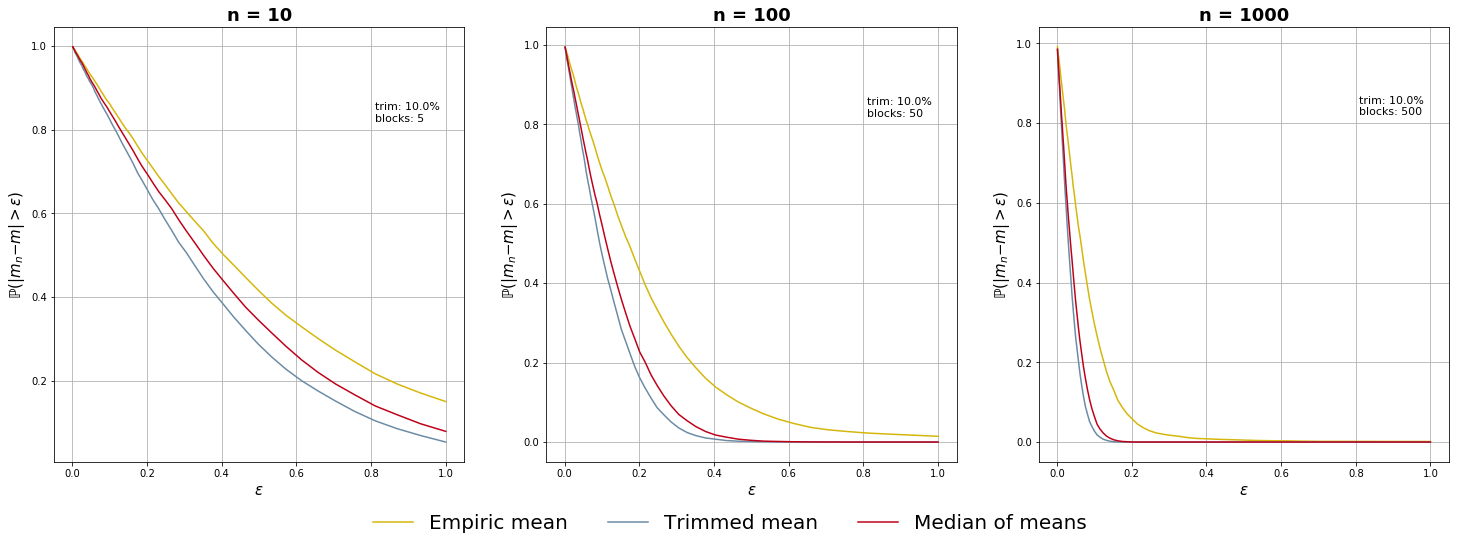

In [219]:
trim = 0.1
blocks = [5,50,500]
n_vars = [10,100,1000]
df = 2

fig,axes= plt.subplots(nrows = 1, ncols = 3, figsize = (25,8))
np.random.seed(42)

for ind,n_var in enumerate(n_vars):
    X = np.reshape(np.random.standard_t(df=df,size=k*n_var),(k,n_var))
    
    emp_mean = np.mean(X,axis=1)
    axes[ind].plot(epsilon,comp_probs(emp_mean,epsilon),color = sns.xkcd_rgb["dark yellow"])
    
    trim_mean = stats.trim_mean(X,trim,axis =1)
    axes[ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = sns.xkcd_rgb["grey blue"])
    
    mom = comp_mom(X,blocks[ind])
    axes[ind].plot(epsilon,comp_probs(mom,epsilon),color = sns.xkcd_rgb["scarlet"]) 
    
    axes[ind].set_xlabel("$\epsilon$",fontsize=15)
    axes[ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    axes[ind].text(x=0.81,y=0.82,s=f"trim: {trim*100}%\nblocks: {blocks[ind]}",fontsize=11)
    
    axes[ind].grid(True)

axes[0].set_title("n = 10",fontsize = 18,fontweight = 1000)
axes[1].set_title("n = 100",fontsize = 18,fontweight = 1000)
axes[2].set_title("n = 1000",fontsize = 18,fontweight = 1000)

fig.legend(["Empiric mean","Trimmed mean","Median of means"],fontsize = 20,loc = (0.25,0),ncol = 3,frameon=False)            
#fig.suptitle("Comparison between different mean estimators for iid Student distributed random variables",fontsize = 30,y=1);
fig.savefig(f"Student_df{df}_comparison",bbox_inches='tight')

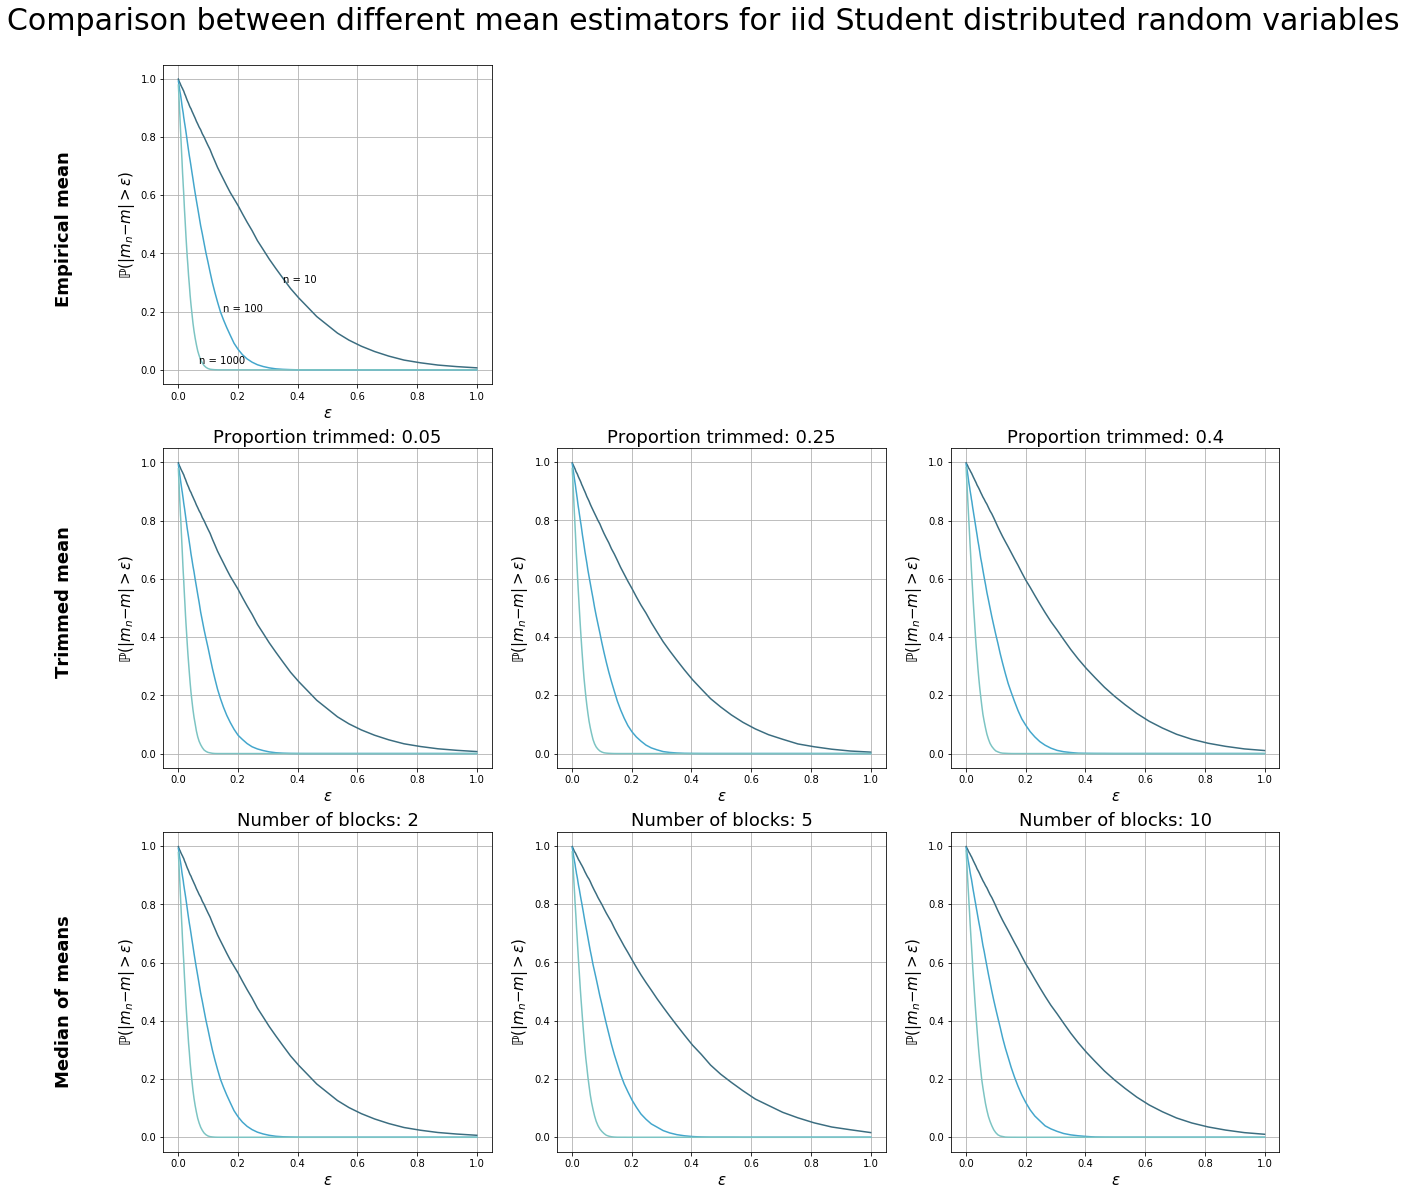

In [10]:
trim_props = [0.05,0.25,0.4]
mom_blocks = [2,5,10]
n_vars = [10,100,1000]
k=10000
df = 10

fig,axes= plt.subplots(nrows = 3, ncols = 3, figsize = (20,20))

palette = sns.color_palette("GnBu_d", n_colors = len(n_vars))
for palette_ind,n_var in enumerate(n_vars):
    X = np.reshape(np.random.standard_t(df=df,size=k*n_var),(k,n_var))
    
    # Empirical mean
    emp_mean = np.mean(X,axis=1)
    axes[0,0].plot(epsilon,comp_probs(emp_mean,epsilon),color = palette[palette_ind])
    axes[0,0].grid(True)
    axes[0,0].set_xlabel("$\epsilon$",fontsize=15)
    axes[0,0].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    axes[0,1].set_visible(False)
    axes[0,2].set_visible(False)
    
    # Trimmed mean
    
    for ind,trims in enumerate(trim_props):
        trim_mean = stats.trim_mean(X,trims,axis =1)
        axes[1,ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = palette[palette_ind])
        axes[1,ind].grid(True)
        axes[1,ind].set_title("Proportion trimmed: " + str(trims),fontsize = 18)
        axes[1,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[1,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    # Median of means
    
    for ind,block in enumerate(mom_blocks):    
        mom = comp_mom(X,block)
        axes[2,ind].plot(epsilon,comp_probs(mom,epsilon),color = palette[palette_ind]) 
        axes[2,ind].grid(True)
        axes[2,ind].set_title("Number of blocks: " + str(block),fontsize=18)
        axes[2,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[2,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
        

axes[0,0].annotate("n = 10", (0.35,0.3))
axes[0,0].annotate("n = 100", (0.15,0.2))
axes[0,0].annotate("n = 1000", (0.07,0.02))

fig.text(0.05,0.81,"Empirical mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.55,"Trimmed mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.28,"Median of means",fontsize = 18,fontweight = 1000, rotation = 90)
fig.suptitle("Comparison between different mean estimators for iid Student distributed random variables",fontsize = 30,y=0.92);

## Problem 4

Random projections illustration.

In [239]:
import sklearn.preprocessing as skprep
def distance_sq(x,y):
    return np.sqrt((np.sum((y-x)**2)))
    
def compute_pair_wise_dist(X):
    nrow,ncol = X.shape
    dist = []
    for r in np.arange(nrow):
        ind = r+1
        while ind < nrow:
            dist.append(distance_sq(X[r,:],X[ind,:]))
            ind = ind + 1            
    return dist

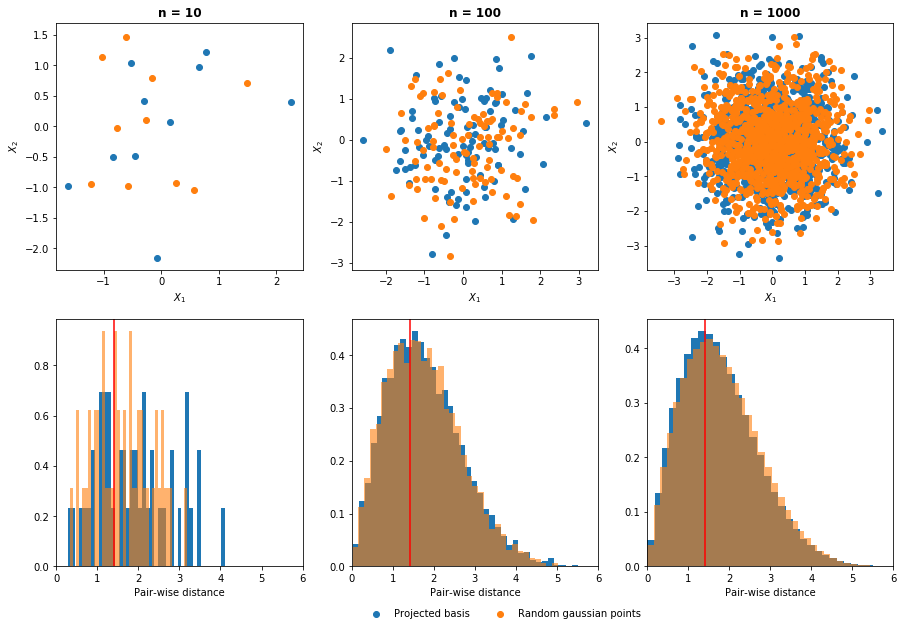

In [301]:
n=[10,100,1000]

fig,axes =  plt.subplots(nrows = 2, ncols = 3,figsize = (15,10))

for ind,var in enumerate(n):


    stan_basis = np.identity(var)
    np.random.seed(40)
    W = np.reshape(np.random.normal(0,1,size=(2*var)),(var,2))
    proj = stan_basis@W

    scaler = skprep.StandardScaler()
    scaled = scaler.fit_transform(proj)
    
    np.random.seed(41)
    r_points = np.random.randn(var,2)
    
    axes[0,ind].scatter(scaled[:,0], scaled[:,1])
    axes[0,ind].scatter(r_points[:,0], r_points[:,1])
    axes[0,ind].set_xlabel("$X_1$",fontsize=10)
    axes[0,ind].set_ylabel("$X_2$",fontsize=10)
    axes[0,ind].set_title(f"n = {var}",fontsize = 12,fontweight = 1000,)
    
    
    axes[1,ind].hist(np.array(compute_pair_wise_dist(scaled)),bins=40,density=True)
    axes[1,ind].hist(np.array(compute_pair_wise_dist(r_points)),bins=40,density=True,alpha=0.6)
    axes[1,ind].set_xlim(0,6)
    axes[1,ind].axvline(np.sqrt(2),color='red')
    axes[1,ind].set_xlabel("Pair-wise distance",fontsize=10)

fig.legend(["Projected basis","Random gaussian points"],loc = (0.4,0.03),frameon=False,ncol=2)
fig.savefig("standard_basis_proj",bbox_inches='tight')

Text(0, 0.5, '$\\epsilon$')

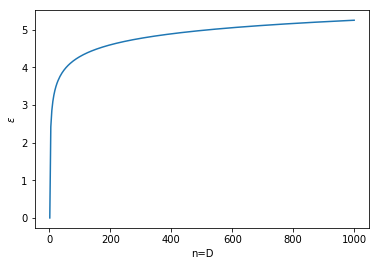

In [302]:
n =  np.linspace(1,1000,300)
plt.plot(n,np.sqrt(8*np.log(n)/2))
plt.xlabel("n=D")
plt.ylabel('$\epsilon$')
#plt.xscale('log')


In [7]:
sns.color_palette("Blues",5),

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]